<a href="https://colab.research.google.com/github/ScaMark/Machine-Learning/blob/main/DecisionTreeClassifier_doc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees
The dataset used to illustrate the example is the Iris dataset, a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris setosa, Iris versicolor and Iris Virginica showed in the following figure. The dataset is already clean, balanced and merely representative of the population. No ***sampling bias*** is introduced.

## Load and analyze the data set

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris) #Let's see what we have in iris (Bunch object type)


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In the Iris dataset there are different elements of different data type
**'data'**: features values,  label is included<br>
**'target'**: labels mapped to numbers <br>
**'frame'**: 'data' + 'target' <br>
**'target_names'**: actual labels' names <br>
**'DESCR'**: Dataset Description <br>
**'feature_names'**: self-explanatory <br>
**'filename'**: name_file.file_format, in this case *iris.csv* <br>
**'data_module'**: Python module path <br>

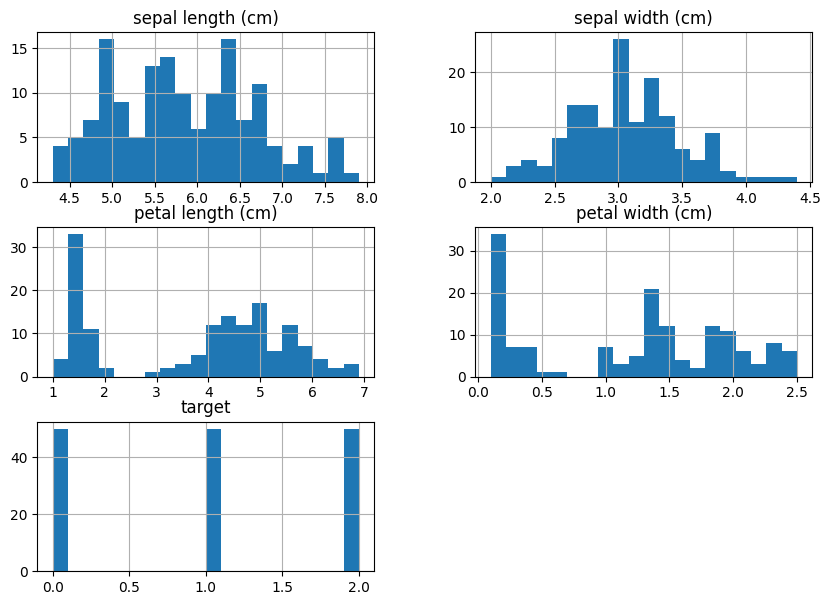

In [ ]:
iris_frame = iris.frame;
iris_frame.hist(bins=20, figsize=(10,7));

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
iris.data.head(5) # first five instances

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
print(iris.target_names) # Labels

['setosa' 'versicolor' 'virginica']


In [ ]:
iris.target[0:149:50]

,target
0,0
50,1
100,2


Labels are associated with numbers, so it will be:

*   Setosa     -> 0
*   Versicolor -> 1
*   Virginica  -> 2

The dataset is already splitted up into data and targets, it's only needed to assign them to variables, on which the model will be trained and evaluated.
We will only be working with two features: petal length and petal width.

Not all the features are always useful to the identification and classification of data instances. Actually, sometimes some of the features can even be misleading due to the non-relevancy and noise they suffer. Other times, features can be combined to create more useful ones. Before training the model, features must be accuratedly selected. This process is usually referred to as "***feature engineering***".

In [ ]:
from sklearn.utils import shuffle

X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

X_iris_shuffled, y_iris_shuffled = shuffle(X_iris, y_iris, random_state = 42)

# Splitting the shuffled data set in this proportion 80% train set - 20% test set
X_iris_train = X_iris_shuffled[:120]
y_iris_train = y_iris_shuffled[:120]

X_iris_test =  X_iris_shuffled[120:]
y_iris_test = y_iris_shuffled[120:]

# To split and shuffle all at once
#from sklearn.model_selection import train_test_split
#train_set, test_set = train_test_split(iris.frame, random_state = 42, train_size=0.9)

Let's now instantiate and assign a Decision Tree Classifier. It is then trained through the fit method, which receives in input the training set, divided into training data and training labels.
Scikit-Learn uses the CART algorithm, which produces only binary trees, meaning trees where split nodes always have exactly two children (i.e., questions only have yes/no answers). However, other algorithms, such as ID3, can produce decision trees with nodes that have more than two children.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state=42) #pre-pruning
tree_clf.fit(X_iris_train, y_iris_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

The model is now trained. It can be visualized with the export_graphviz and Source modules. The first allows to export and save the tree to an image, the latter to source it.


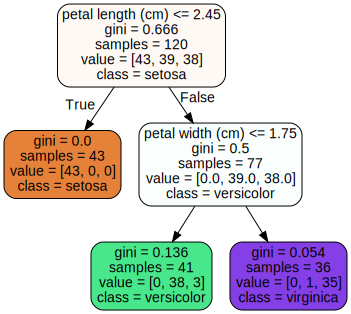

In [ ]:
from sklearn.tree import export_graphviz
from pathlib import Path


IMAGES_PATH = Path() / "images" / "classification" #define path
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

# Defining a function to save images
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Export a decision tree in dot format
export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH/"iris_tree.dot"),
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

from graphviz import Source
# Source and display image
Source.from_file(IMAGES_PATH/"iris_tree.dot")

In [ ]:
# Converts from dot to png
!dot -Tpng {IMAGES_PATH / "iris_tree.dot"} -o {IMAGES_PATH / "iris_tree.png"}

## Making predictions
Decision trees can also be visualized in an alternative form. The entire dataset can be plotted in a two-dimensional space, where the two dimensions correspond to the 2 flower features. Then, the thresholds (or split-points) are plotted along one or the other direction. This allows us to graphically notice in which class data are falling and adjust the decision tree hyperparameters accordingly (for example, an higher max_depth will reflect in a higher number of thresholds and so a finer boundary. However, too much refinement can lead to overfitting.

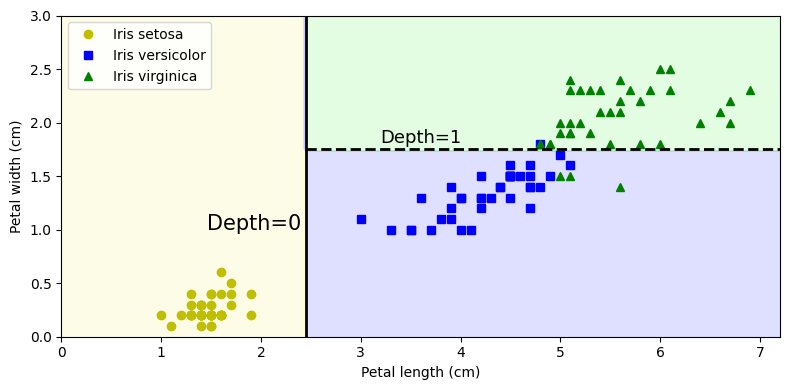

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# extra code – just formatting details
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):

    plt.plot(X_iris_train[:, 0][y_iris_train == idx], X_iris_train[:, 1][y_iris_train == idx],
             style, label=f"Iris {name}")

# The tree structure and properties are available via the classifier’s tree_ attribute. Type help(tree_clf.tree_) for more details.
th0,th1 = tree_clf.tree_.threshold[[0, 2]] # holds the threshold for every node (we're interested only in internal nodes)

# Plotting the data in a two-dimensional plane, which axis are petal length and width.
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.axis([0, 7.2, 0, 3])
plt.legend()
save_fig("decision_tree_decision_boundaries_plot")

plt.show()

## Deeper Decision Tree Classifier

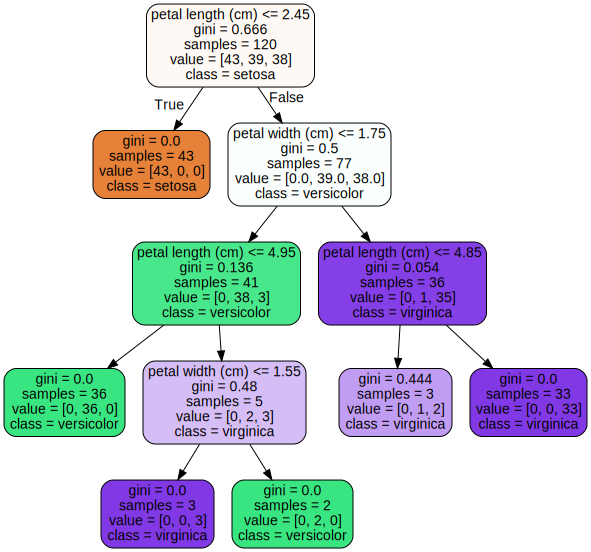

In [ ]:
tree_clf_deeper = DecisionTreeClassifier(random_state=42)
tree_clf_deeper.fit(X_iris_train, y_iris_train)

export_graphviz(
        tree_clf_deeper,
        out_file=str(IMAGES_PATH/"iris_tree_deeper.dot"),
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

from graphviz import Source
# Source and display image
Source.from_file(IMAGES_PATH/"iris_tree_deeper.dot")

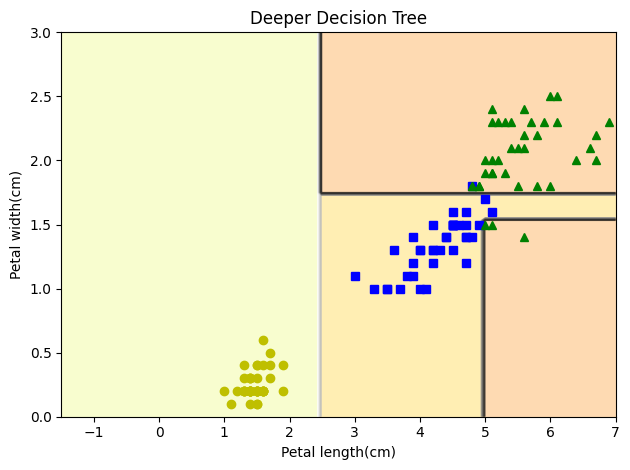

In [ ]:
def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 150),
                         np.linspace(axes[2], axes[3], 150))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27",'#a0faa0'], "Pastel1": ["red", "blue"]}
    markers = ("o", "^","*")
    for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
      plt.plot(X[:, 0][y == idx], X[:, 1][y == idx], style, label=f"Iris {name}")
    #plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=custom_cmap)
    plt.xlabel("Petal length(cm)")
    plt.ylabel("Petal width(cm)", rotation=90)


plot_decision_boundary(tree_clf_deeper, X_iris_train[:], y_iris_train[:], axes=[-1.5, 7, 0, 3], cmap="Wistia")
plt.title("Deeper Decision Tree")
save_fig("Deeper_Decision_Tree")
plt.show()

### Hyperparameter regularization/tuning
Hyperparameter are parameters of the model, they are set in order to achieve the best possible model. They are applied to constraint the model and do not affect the learning algorithm as they're set before and kept constant during the whole training process.
These two tree models constitute and example of hyperparameter regularization. The hyperparameter being tuned is the maximum depth of the tree. This is also called "pre-pruning". Model properties are accessed via the tree_ attribute of the tree.

By looking at the decision boundary graphs, we can say that the deeper classification tree may be achieving a higher accuracy on the train set, however, it may also be overfitting the dataset. This can compromise its ability to ***generalize*** on data coming from the real world, leading to an accuracy degradation. Let's check this out.

## Model performance evaluation

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

# Predict labels on test set
y_pred = tree_clf.predict(X_iris_test)
y_pred_deeper = tree_clf_deeper.predict(X_iris_test)

In [ ]:
# Accuracy on train set
print("Tree, accuracy on train set:\n",accuracy_score(y_iris_train, tree_clf.predict(X_iris_train)))
print("Deeper tree, accuracy on train set:\n",accuracy_score(y_iris_train, tree_clf_deeper.predict(X_iris_train)),"\n")

# Accuracy on test set
print("Tree, accuracy on test set:\n",accuracy_score(y_iris_test, y_pred))
print("Deeper tree, accuracy on test set:\n",accuracy_score(y_iris_test, y_pred_deeper))

Tree, accuracy on train set:
 0.9666666666666667
Deeper tree, accuracy on train set:
 0.9916666666666667 

Tree, accuracy on test set:
 0.9333333333333333
Deeper tree, accuracy on test set:
 0.9333333333333333


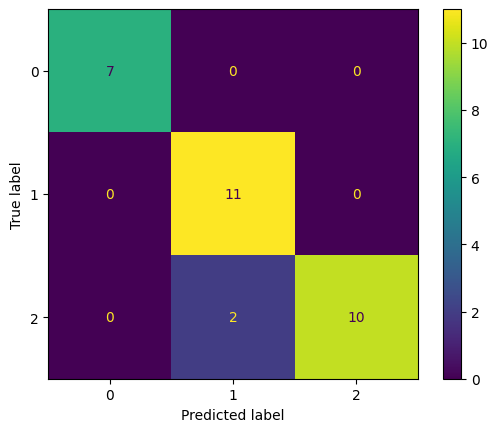

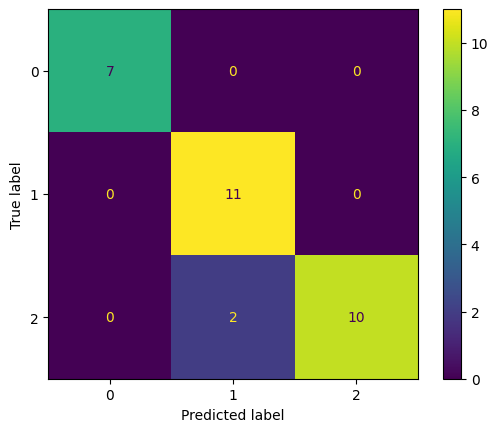

In [ ]:
# Confusion Matrix (Multi label)
cm1 = confusion_matrix(y_iris_test, y_pred, labels = tree_clf.classes_)
cm2 = confusion_matrix(y_iris_test, y_pred_deeper,labels = tree_clf.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,
                              display_labels=tree_clf.classes_)
disp1.plot()
plt.show()
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=tree_clf.classes_)
disp2.plot()
plt.show()

In [ ]:
# Precision
print(precision_score(y_iris_test, y_pred, average='weighted')) # Multilabel evaluation, need a way to average
print(precision_score(y_iris_test, y_pred_deeper, average='weighted'))

0.9435897435897436
0.9435897435897436


In [ ]:
# Recall (Sensitivity)
print(recall_score(y_iris_test, y_pred, average='weighted'))
print(recall_score(y_iris_test, y_pred_deeper, average='weighted'))

0.9333333333333333
0.9333333333333333


In [ ]:
# F1-score
print(f1_score(y_iris_test, y_pred, average='weighted'))
print(f1_score(y_iris_test, y_pred_deeper, average='weighted'))

0.9330808080808081
0.9330808080808081


In [ ]:
# cross_validation score
tree_clf_scores = cross_val_score(tree_clf, X_iris_train, y_iris_train, cv=3, scoring="accuracy")
print(tree_clf_scores.mean())
tree_clf_deeper_scores = cross_val_score(tree_clf_deeper, X_iris_train, y_iris_train, cv=3, scoring="accuracy")
print(tree_clf_deeper_scores.mean())

0.9500000000000001
0.9500000000000001


So, once both the models have been evaluated, we need to make a choice between these two options. Let's analyze the performances obtained. Both the trees return the same values for all the metrics except for one, i.e. accuracy on the train set.
The deeper tree achieves a higher accuracy on that data set, but it is not doing better than the other tree on the test set. As previously guessed, this might be interpreted as a classical symptom of overfitting: more complex model working better only on the train set => no real ability enchancement in classifying instances.
Its ability to generalize could be further verified and validated with another dataset of flowers that the model has never seen.
This is not in our purposes for now. Anyways, which model would you choose between a simpler and a more complex one that just perform the same? Clearly, the "pre-pruned" one.


## Estimated Class Probabilities
A decision tree can also estimate the probability that an instance belongs to a particular class k. First it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class k in this node. For example, suppose you have found a flower whose petals are 5 cm long and 1.5 cm wide. The corresponding leaf node is the depth-2 left node, so the decision tree outputs the following probabilities: 0% for Iris setosa (0/54), 90.7% for Iris versicolor (49/54), and 9.3% for Iris virginica (5/54). And if you ask it to predict the class, it outputs Iris versicolor (class 1) because it has the highest probability. Probabilities are said to be estimated because the probability is estimated on the training set (not on actual data from the real world). Let’s check this by supposing we want to predict the probability and the class for a flower characterized by a petal length and width of respectively 5cm and 1.5cm.
Probabilities are rounded off to three digits.

In [ ]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.927, 0.073]])

In [ ]:
tree_clf.predict([[5, 1.5]]) # it will most likely be an iris versicolor

array([1])

## RTL implementation
What do we need to implement the model with Hardware Description Languages? We need to know the features used to split the node, the classes and the thresholds. Using the tree_ attribute we can access the tree structure.

In [ ]:
tree_clf.tree_.feature

array([ 0, -2,  1, -2, -2], dtype=int64)

Scikit-learn uses -2 as a sentinel value to indicate a leaf node — a node that does not split further, they are not necessary.


In [ ]:
print(tree_clf.tree_.feature[ tree_clf.tree_.feature != -2])

[0 1]


In [ ]:
print(tree_clf.tree_.threshold[ tree_clf.tree_.feature != -2 ])

[2.44999999 1.75      ]
